# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [278]:
# !pip install folium

In [279]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m # kekw bebra

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [280]:
import numpy as np

import pandas as pd# your favorite data package
from matplotlib import pyplot as plt  # your favorite visualization package

In [281]:
%matplotlib inline

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [282]:
df = pd.read_csv('train.csv')
df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1021522,id2373225,1,2016-06-18 04:32:05,2016-06-18 04:37:38,1,-73.997147,40.716499,-73.988419,40.718479,N,333
1074600,id3345846,1,2016-01-31 12:09:32,2016-01-31 12:11:35,1,-73.983971,40.775154,-73.979065,40.782051,N,123
168809,id3249630,1,2016-04-15 16:55:45,2016-04-15 17:08:59,1,-73.960297,40.770557,-73.960037,40.763725,N,794
1071261,id3301694,2,2016-04-16 14:38:43,2016-04-16 14:53:17,1,-73.955307,40.773560,-73.966759,40.800930,N,874
177589,id0858484,2,2016-03-13 03:16:06,2016-03-13 03:22:27,2,-73.962051,40.715809,-73.943329,40.708099,N,381
988095,id1219284,1,2016-02-25 01:27:31,2016-02-25 01:47:21,1,-73.990379,40.761398,-73.993942,40.695702,N,1190
313798,id1560210,2,2016-06-11 02:12:31,2016-06-11 02:24:36,2,-73.986618,40.718182,-73.967537,40.756222,N,725
1186166,id3702612,2,2016-06-04 02:24:06,2016-06-04 02:34:58,2,-73.987175,40.718956,-73.983002,40.738682,N,652
1024290,id2348160,2,2016-04-22 12:13:30,2016-04-22 12:57:32,4,-73.993439,40.729698,-73.980652,40.773251,N,2642
598309,id3838480,1,2016-05-24 23:53:05,2016-05-24 23:58:26,1,-73.987740,40.728062,-74.000664,40.727455,N,321


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [283]:
df.drop(columns=['dropoff_datetime'], inplace=True)

In [284]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [285]:
df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<Axes: xlabel='trip duration (millions of minutes)', ylabel='amount of trips (millions)'>

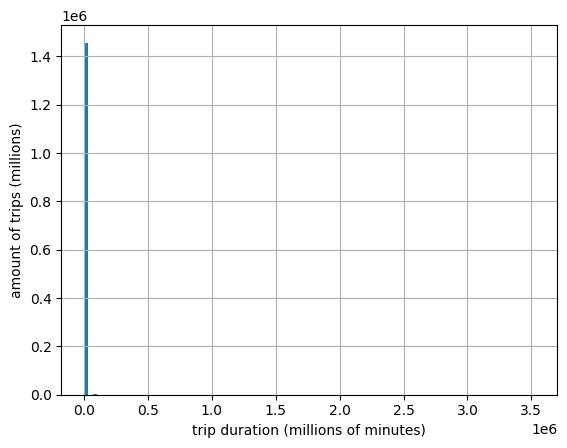

In [286]:
target = df['trip_duration']
plt.xlabel('trip duration (millions of minutes)')
plt.ylabel('amount of trips (millions)')
target.hist(bins=100)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Практически все значение содержаться в небольшом промежутке. И есть какие-то выбросы, которые задают масштаб нашей гистограммы.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSE гораздо более чуствительна к сильно выделяющимся выбросам, которые, как мы можем видеть из гистограммы значений, содержаться в нашей выборке.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$
$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(y_i - a(x_i)\big)^2}$$

$$\text{RMSLE}(X, y, a) = \text{RMSE}(X, \hat{y}, \hat{a}) \Rightarrow \min_{a}{\text{RMSLE}(X, y, a)} = \min_{\hat{a}}\text{RMSE}(X, \hat{y}, \hat{a}) \Rightarrow \\
\Rightarrow \argmin_{a}{\text{RMSLE}(X, y, a)} = \exp{ \left(\argmin_{\hat{a}}\text{RMSE}(X, \hat{y}, \hat{a}) \right)} - 1$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [287]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

<Axes: >

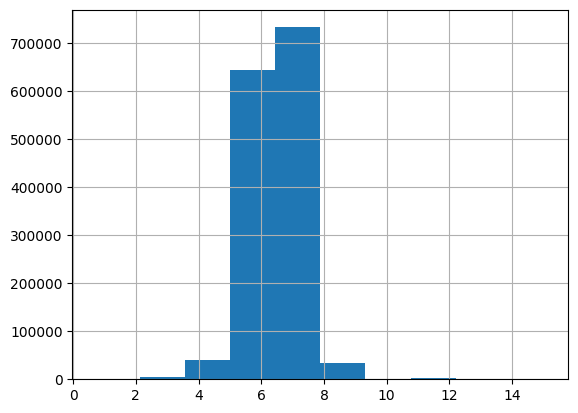

In [288]:
df['log_trip_duration'].hist()

In [289]:
df.drop(columns='trip_duration', inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [290]:
def rmsle(log1p_y_true, log1p_y_pred):
    l = len(log1p_y_true)
    return np.sqrt(np.sum((log1p_y_true - log1p_y_pred) ** 2) / l)

best_const_estimator = np.mean(df['log_trip_duration'])
rmsle_best_const = rmsle(df['log_trip_duration'], best_const_estimator)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


best constant:	 6.50 ± 0.1
mean:		 6.47 ± sqrt(machine eps)


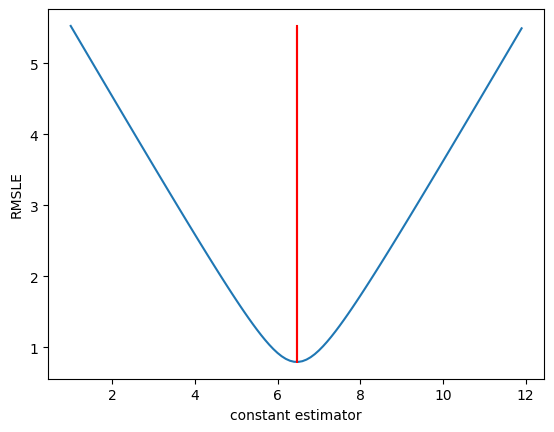

In [291]:
estimators = np.arange(1, 12, 0.1)

errors = [rmsle((df['log_trip_duration']), e) for e in estimators]

fig, ax = plt.subplots()

plt.xlabel('constant estimator')
plt.ylabel('RMSLE')
ax.plot(estimators, errors)
ax.plot([best_const_estimator for i in range(len(errors))], errors, color='red', )
print(f'best constant:\t{estimators[errors.index(min(errors))]: 0.2f} ± 0.1')
print(f'mean:\t\t{best_const_estimator: 0.2f} ± sqrt(machine eps)')
plt.show()

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [292]:
df['pickup_datetime'].sample(10)

736839    2016-02-12 10:23:39
1428246   2016-01-19 18:17:30
684611    2016-01-25 05:19:42
861371    2016-06-18 03:28:26
1382845   2016-06-18 21:42:31
62820     2016-02-21 05:18:35
448412    2016-04-05 03:36:26
1078934   2016-03-19 07:50:44
190883    2016-05-28 23:38:24
1058347   2016-02-20 03:48:40
Name: pickup_datetime, dtype: datetime64[ns]

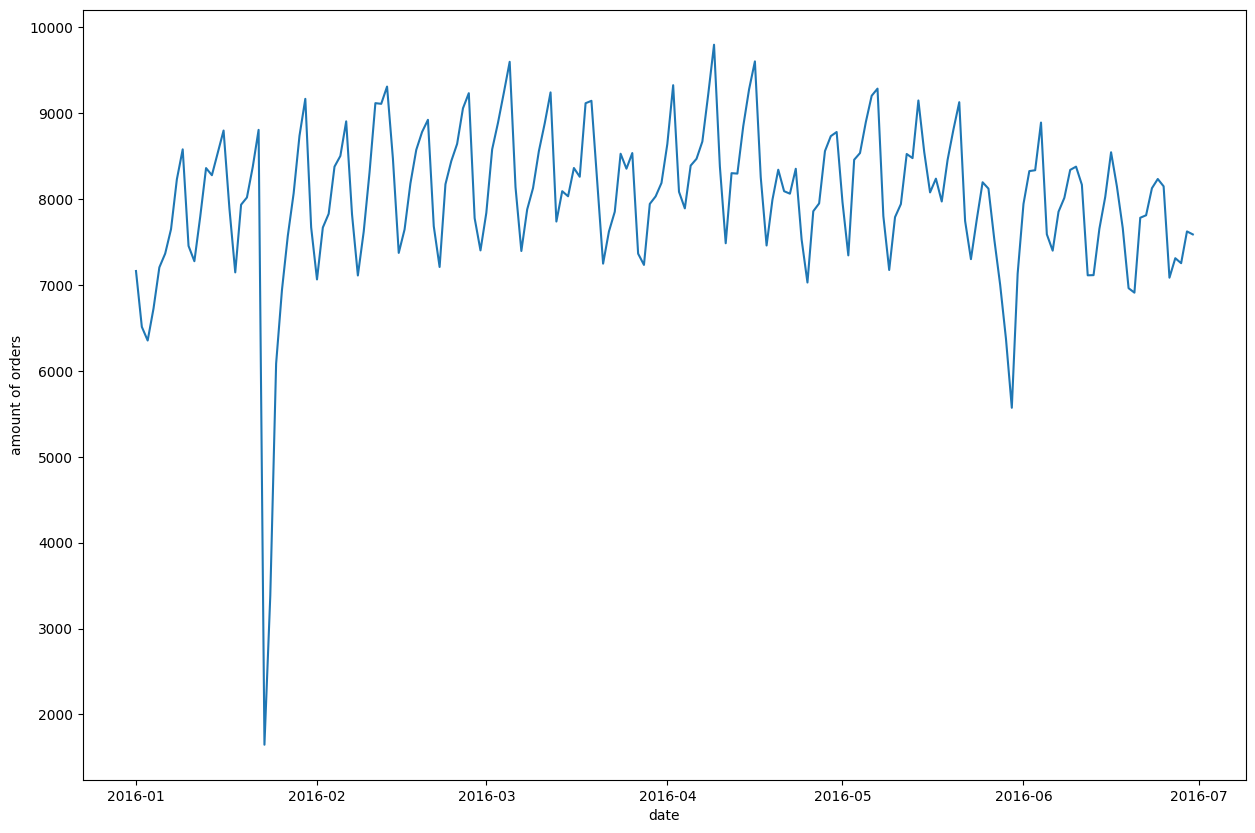

In [293]:
df['pickup_datetime'].apply(lambda x: x.date()).value_counts().plot(figsize=(15, 10))
plt.ylabel('amount of orders')
plt.xlabel('date')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [294]:
d = df['pickup_datetime'].apply(lambda x: x.date()).value_counts()
d.tail(15)

pickup_datetime
2016-06-26    7084
2016-02-01    7064
2016-04-25    7028
2016-05-28    7004
2016-06-19    6962
2016-01-26    6941
2016-06-20    6910
2016-01-04    6725
2016-01-02    6512
2016-05-29    6372
2016-01-03    6353
2016-01-25    6084
2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: count, dtype: int64

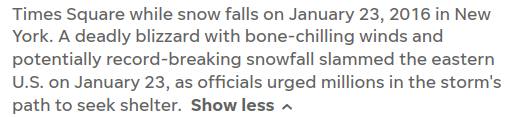

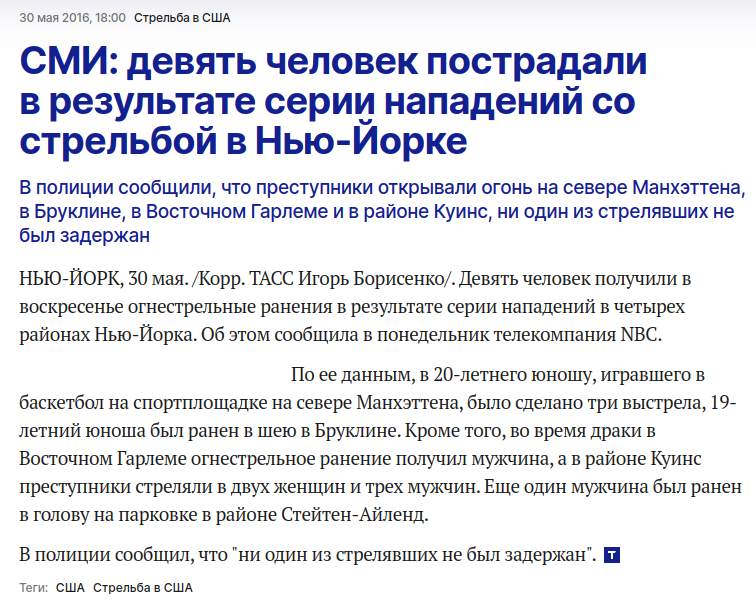

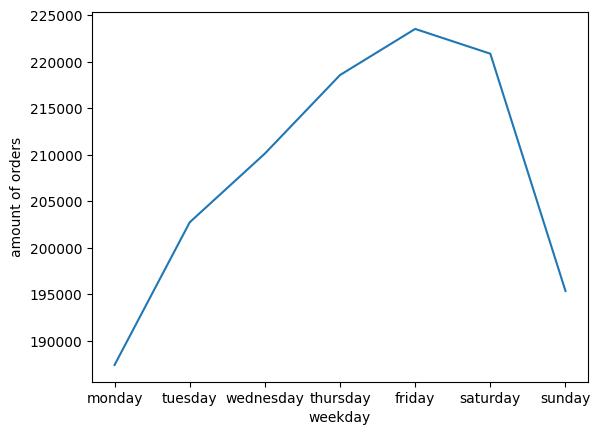

In [295]:
weekday_orders = df['pickup_datetime'].apply(lambda x: x.weekday()).value_counts().to_dict()
weekdays = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thursday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
}

plt.plot(weekdays.values(), list(map(weekday_orders.get, weekdays.keys())))

plt.ylabel('amount of orders')
plt.xlabel('weekday')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [296]:
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['day_of_week'] = df['pickup_datetime'].apply(lambda x: x.weekday())
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)

In [297]:
monthly_hourly = df.groupby(['month'])['hour'].value_counts()

In [298]:
monthly_hourly[1].head()

hour
18    14402
19    14116
20    13250
21    12823
17    12538
Name: count, dtype: int64

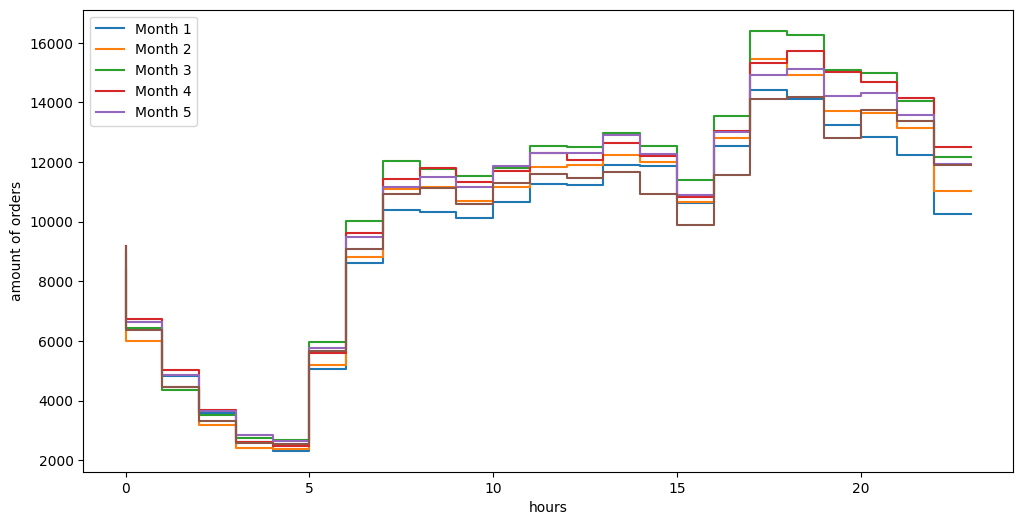

In [299]:
plt.figure(figsize=(12, 6))
for month in range(1, 7):
    x = monthly_hourly[month].index
    y = monthly_hourly[month].values
    plt.legend(labels=[f'Month {month}' for month in range(1, 7)])
    plt.xlabel('hours')
    plt.ylabel('amount of orders')

    x2,y2 = zip(*sorted(zip(x,y),key=lambda x: x[0])) # https://stackoverflow.com/questions/31653968/matplotlib-connecting-wrong-points-in-line-graph
    plt.step(x2,y2)
plt.show()

In [300]:

weekly_hourly = df.groupby(['day_of_week'])['hour'].value_counts()

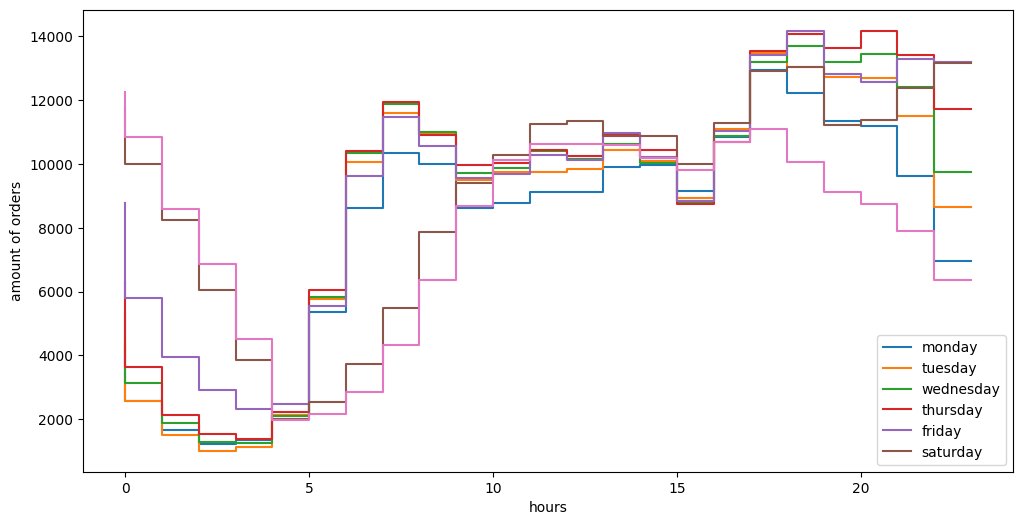

In [301]:
plt.figure(figsize=(12, 6))
for weekday in range(7):
    x = weekly_hourly[weekday].index
    y = weekly_hourly[weekday].values
    plt.legend(labels=[f'{weekdays[weekday]}' for weekday in range(7)])
    plt.xlabel('hours')
    plt.ylabel('amount of orders')

    x2,y2 = zip(*sorted(zip(x,y),key=lambda x: x[0])) # https://stackoverflow.com/questions/31653968/matplotlib-connecting-wrong-points-in-line-graph
    plt.step(x2,y2)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Все месяца выглядят однородно, что соответвует здравому смыслу.

Дни недели явно разбиваются на выходные и будни. Это видно по тому, как в промежутке от 0 до 5 поездки в субботу и воскресение (коричневая и розовая линии) находятся сверху остальных дней недели, и как они потом опускаются нижу будних в часы, когда в будни люди едут на работу. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [302]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,3,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,4,2,19
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,4,4,13
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,1,6,7
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,4,4,6
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1,1,15


In [303]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7)
print(train.shape)
print(test.shape)
train.shape[0] / 0.7 - test.shape[0] / 0.3

(1021050, 13)
(437594, 13)


-3.8095238094683737

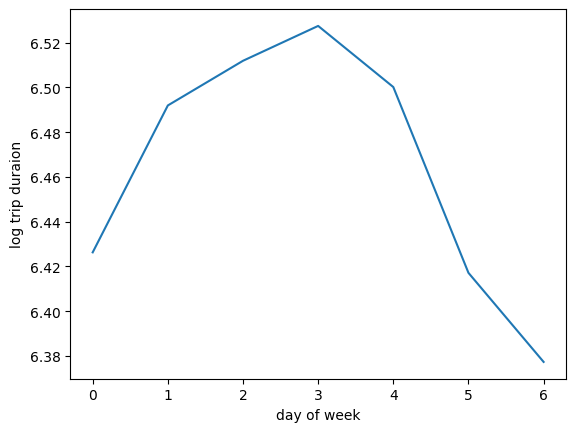

In [304]:
train.groupby('day_of_week')['log_trip_duration'].mean().plot()
plt.ylabel('log trip duraion')
plt.xlabel('day of week')
plt.show()

In [305]:
train['yday'] = train['pickup_datetime'].apply(lambda x: x.timetuple().tm_yday)
test['yday'] = test['pickup_datetime'].apply(lambda x: x.timetuple().tm_yday)

In [306]:
import datetime as dt
print(dt.datetime.strptime('2016-01-23', '%Y-%m-%d').timetuple().tm_yday)
print(dt.datetime.strptime('2016-05-30', '%Y-%m-%d').timetuple().tm_yday)

23
151


In [307]:
train['is_anomaly'] = False
test['is_anomaly'] = False

In [308]:
train.loc[train['yday'].apply(lambda x: x in [23, 24, 25, 151]), 'is_anomaly'] = True
test.loc[test['yday'].apply(lambda x: x in [23, 24, 25, 151]), 'is_anomaly'] = True

In [309]:
train[train['is_anomaly']]
test[test['is_anomaly']]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour,yday,is_anomaly
1400742,id0380475,1,2016-01-25 13:43:32,1,-74.006775,40.730824,-74.000099,40.728539,N,5.652489,1,0,13,25,True
296374,id1210477,1,2016-05-30 23:36:13,1,-74.003883,40.707161,-73.921013,40.756710,N,7.056175,5,0,23,151,True
1116935,id3817627,2,2016-01-24 11:47:27,1,-73.974388,40.756390,-73.989990,40.738602,N,6.605298,1,6,11,24,True
1229793,id2900722,2,2016-01-23 00:20:33,5,-73.999138,40.760590,-73.931313,40.755161,N,7.965893,1,5,0,23,True
800180,id3819993,1,2016-01-24 16:30:57,1,-73.959198,40.780300,-73.952866,40.783203,N,5.616771,1,6,16,24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031848,id3929258,1,2016-01-23 01:56:08,1,-73.974800,40.752583,-73.980553,40.743202,N,5.568345,1,5,1,23,True
1064024,id0519531,2,2016-01-25 02:25:05,1,-73.989006,40.745724,-73.994850,40.721355,N,6.519147,1,0,2,25,True
109186,id2206774,1,2016-01-24 22:19:48,2,-73.949501,40.741699,-73.995354,40.754635,N,6.545350,1,6,22,24,True
1424978,id3394947,1,2016-01-25 12:02:32,1,-73.981697,40.758923,-73.870300,40.773403,N,8.535033,1,0,12,25,True


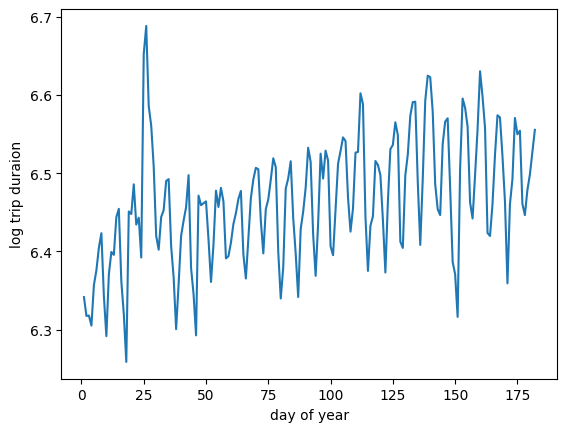

In [310]:
train.groupby('yday')['log_trip_duration'].mean().plot()
plt.ylabel('log trip duraion')
plt.xlabel('day of year')
plt.show()

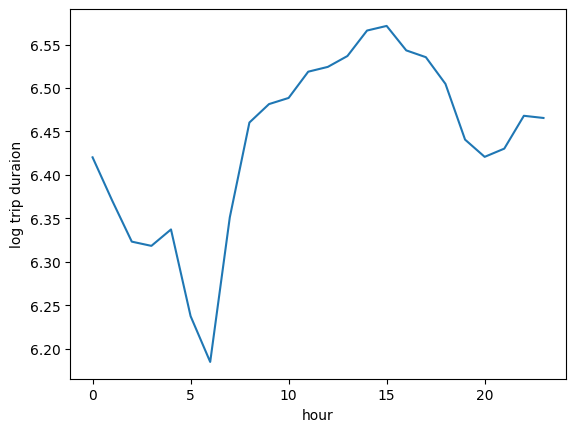

In [311]:
train.groupby('hour')['log_trip_duration'].mean().plot()
plt.ylabel('log trip duraion')
plt.xlabel('hour')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Все уже сделано в прошлых заданиях :)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

In [312]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour,yday,is_anomaly
146123,id1694497,2,2016-06-18 12:42:24,1,-73.960510,40.775528,-73.969444,40.763435,N,5.627621,6,5,12,170,False
1306158,id2475967,1,2016-06-06 03:01:04,1,-73.986374,40.755756,-73.950806,40.706764,N,6.981935,6,0,3,158,False
593196,id1182963,1,2016-03-11 08:04:18,1,-74.005424,40.738907,-73.954605,40.767113,N,7.494986,3,4,8,71,False
1106109,id2983052,2,2016-03-20 11:45:31,1,-73.961098,40.775082,-73.954170,40.778610,N,5.521461,3,6,11,80,False
490372,id3190067,2,2016-05-11 08:37:33,1,-74.015251,40.715977,-74.004829,40.729630,N,6.805723,5,2,8,132,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652827,id0106775,2,2016-06-30 18:46:03,1,-74.013474,40.707695,-73.951141,40.774361,N,7.852439,6,3,18,182,False
102953,id0588255,2,2016-06-04 16:33:08,2,-73.977501,40.763321,-73.979965,40.739021,N,7.040536,6,5,16,156,False
891467,id0334908,2,2016-03-23 01:00:01,1,-73.966728,40.757244,-73.961151,40.760590,N,5.159055,3,2,1,83,False
668391,id3488348,1,2016-04-06 23:51:16,1,-73.992424,40.724720,-74.004204,40.742508,N,6.852243,4,2,23,97,False


vendor_id, month, day_of_week, hour, yday, is_anomaly - категориальные
pickup/dropoff_longitude/latitude - численные

y_day я бы вообще не использовал, из-за того, что кодировать придется порядка 180 значений.


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

Код для в этой ячейке я написал при помощи генеративной языковой модели Claude Sonnet 3.5

In [313]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Разделим признаки на категориальные и числовые
categorical_features = ['month', 'day_of_week', 'hour']
numerical_features = ['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude']

features = categorical_features + numerical_features

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Создаем пайплайн с препроцессором и Ridge-регрессией
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Разделяем данные на обучающую и тестовую выборки
X_train = train[features]
y_train = train['log_trip_duration']

X_test = test[features]
y_test = test['log_trip_duration']

# Обучаем модель
ridge_pipeline.fit(X_train, y_train)

# Оцениваем модель
train_score = ridge_pipeline.score(X_train, y_train)
test_score = ridge_pipeline.score(X_test, y_test)

print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")


Train R² score: 0.0585
Test R² score: 0.0576


Получилось очень плохо. Похоже данные для нашей модели все таки не очень готовы.

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [314]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [315]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,3,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,4,2,19
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,4,4,13
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,1,6,7
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,4,4,6
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1,1,15


Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [316]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sample = df.sample(1000)
your_lat_values = sample['pickup_latitude']
your_lon_values = sample['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

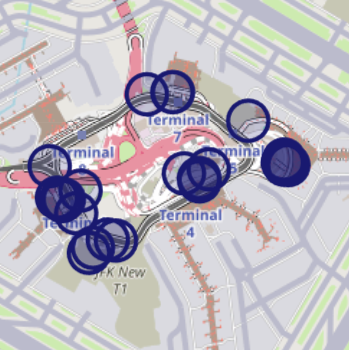 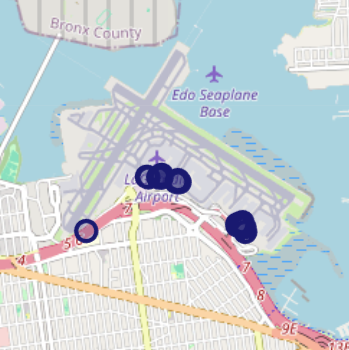 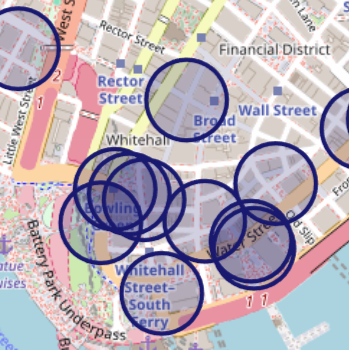

2 аэропорта и какая-то неясная точка на юге около Bowling Green State University

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [317]:
# Код взят с семинара
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train.loc[:, 'haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

In [318]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour,yday,is_anomaly,haversine
146123,id1694497,2,2016-06-18 12:42:24,1,-73.960510,40.775528,-73.969444,40.763435,N,5.627621,6,5,12,170,False,1.540807
1306158,id2475967,1,2016-06-06 03:01:04,1,-73.986374,40.755756,-73.950806,40.706764,N,6.981935,6,0,3,158,False,6.217663
593196,id1182963,1,2016-03-11 08:04:18,1,-74.005424,40.738907,-73.954605,40.767113,N,7.494986,3,4,8,71,False,5.306701
1106109,id2983052,2,2016-03-20 11:45:31,1,-73.961098,40.775082,-73.954170,40.778610,N,5.521461,3,6,11,80,False,0.702999
490372,id3190067,2,2016-05-11 08:37:33,1,-74.015251,40.715977,-74.004829,40.729630,N,6.805723,5,2,8,132,False,1.753863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652827,id0106775,2,2016-06-30 18:46:03,1,-74.013474,40.707695,-73.951141,40.774361,N,7.852439,6,3,18,182,False,9.084496
102953,id0588255,2,2016-06-04 16:33:08,2,-73.977501,40.763321,-73.979965,40.739021,N,7.040536,6,5,16,156,False,2.709957
891467,id0334908,2,2016-03-23 01:00:01,1,-73.966728,40.757244,-73.961151,40.760590,N,5.159055,3,2,1,83,False,0.599197
668391,id3488348,1,2016-04-06 23:51:16,1,-73.992424,40.724720,-74.004204,40.742508,N,6.852243,4,2,23,97,False,2.212993


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

Если брать просто логарифм, корреляция сломается, потому в выборке есть поездки, которые начинаются там же, где заканчиваются. Поэтому, чтобы не логарифмироваь 0, возьмем логарифмирование со сдвигом в 1.

In [319]:
train['log_haversine'] = np.log1p(train['haversine'])
test['log_haversine'] = np.log1p(test['haversine'])

In [320]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour,yday,is_anomaly,haversine,log_haversine
146123,id1694497,2,2016-06-18 12:42:24,1,-73.960510,40.775528,-73.969444,40.763435,N,5.627621,6,5,12,170,False,1.540807,0.932482
1306158,id2475967,1,2016-06-06 03:01:04,1,-73.986374,40.755756,-73.950806,40.706764,N,6.981935,6,0,3,158,False,6.217663,1.976531
593196,id1182963,1,2016-03-11 08:04:18,1,-74.005424,40.738907,-73.954605,40.767113,N,7.494986,3,4,8,71,False,5.306701,1.841613
1106109,id2983052,2,2016-03-20 11:45:31,1,-73.961098,40.775082,-73.954170,40.778610,N,5.521461,3,6,11,80,False,0.702999,0.532391
490372,id3190067,2,2016-05-11 08:37:33,1,-74.015251,40.715977,-74.004829,40.729630,N,6.805723,5,2,8,132,False,1.753863,1.013005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652827,id0106775,2,2016-06-30 18:46:03,1,-74.013474,40.707695,-73.951141,40.774361,N,7.852439,6,3,18,182,False,9.084496,2.310999
102953,id0588255,2,2016-06-04 16:33:08,2,-73.977501,40.763321,-73.979965,40.739021,N,7.040536,6,5,16,156,False,2.709957,1.311020
891467,id0334908,2,2016-03-23 01:00:01,1,-73.966728,40.757244,-73.961151,40.760590,N,5.159055,3,2,1,83,False,0.599197,0.469502
668391,id3488348,1,2016-04-06 23:51:16,1,-73.992424,40.724720,-74.004204,40.742508,N,6.852243,4,2,23,97,False,2.212993,1.167203


Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [321]:
from scipy.stats import pearsonr
target = train['log_trip_duration'].values
distances = train['haversine'].values
log_distances = train['log_haversine'].values

corr_distance, _ = pearsonr(distances, target)
corr_log_distance, _ = pearsonr(log_distances, target)

print(f"Correlation between distance and target:\t{corr_distance: 0.3f}")
print(f"Correlation between log(distance) and target:\t{corr_log_distance: 0.3f}")

Correlation between distance and target:	 0.580
Correlation between log(distance) and target:	 0.750


In [322]:
np.expm1(train['log_trip_duration'])

146123      277.0
1306158    1076.0
593196     1798.0
1106109     249.0
490372      902.0
            ...  
652827     2571.0
102953     1141.0
891467      173.0
668391      945.0
632321      131.0
Name: log_trip_duration, Length: 1021050, dtype: float64

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<Axes: >

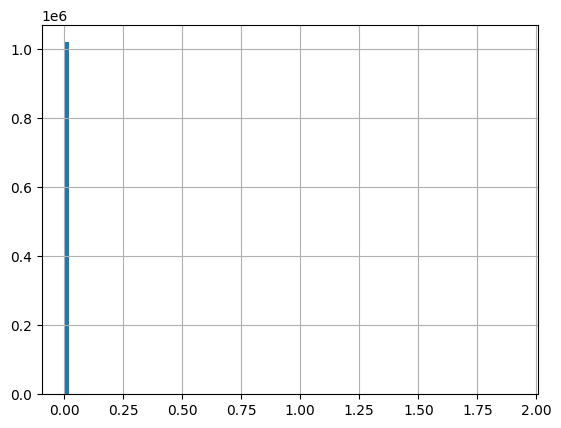

In [323]:
train['speed'] = train['haversine'] / np.expm1(train['log_trip_duration'])
train['speed'].hist(bins=100)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

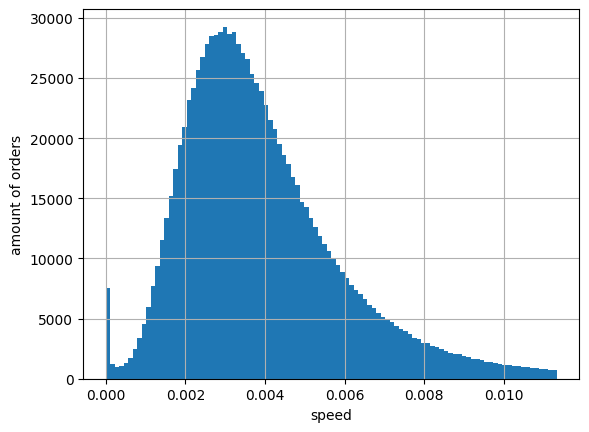

In [324]:
q = train['speed'].quantile(0.99)
train[train['speed'] < q]['speed'].hist(bins=100)
plt.xlabel('speed')
plt.ylabel('amount of orders')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [325]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,day_of_week,hour,yday,is_anomaly,haversine,log_haversine,speed
146123,id1694497,2,2016-06-18 12:42:24,1,-73.960510,40.775528,-73.969444,40.763435,N,5.627621,6,5,12,170,False,1.540807,0.932482,0.005562
1306158,id2475967,1,2016-06-06 03:01:04,1,-73.986374,40.755756,-73.950806,40.706764,N,6.981935,6,0,3,158,False,6.217663,1.976531,0.005778
593196,id1182963,1,2016-03-11 08:04:18,1,-74.005424,40.738907,-73.954605,40.767113,N,7.494986,3,4,8,71,False,5.306701,1.841613,0.002951
1106109,id2983052,2,2016-03-20 11:45:31,1,-73.961098,40.775082,-73.954170,40.778610,N,5.521461,3,6,11,80,False,0.702999,0.532391,0.002823
490372,id3190067,2,2016-05-11 08:37:33,1,-74.015251,40.715977,-74.004829,40.729630,N,6.805723,5,2,8,132,False,1.753863,1.013005,0.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652827,id0106775,2,2016-06-30 18:46:03,1,-74.013474,40.707695,-73.951141,40.774361,N,7.852439,6,3,18,182,False,9.084496,2.310999,0.003533
102953,id0588255,2,2016-06-04 16:33:08,2,-73.977501,40.763321,-73.979965,40.739021,N,7.040536,6,5,16,156,False,2.709957,1.311020,0.002375
891467,id0334908,2,2016-03-23 01:00:01,1,-73.966728,40.757244,-73.961151,40.760590,N,5.159055,3,2,1,83,False,0.599197,0.469502,0.003464
668391,id3488348,1,2016-04-06 23:51:16,1,-73.992424,40.724720,-74.004204,40.742508,N,6.852243,4,2,23,97,False,2.212993,1.167203,0.002342


In [326]:
speed_medians = train.groupby(['day_of_week', 'hour'])['speed'].median()

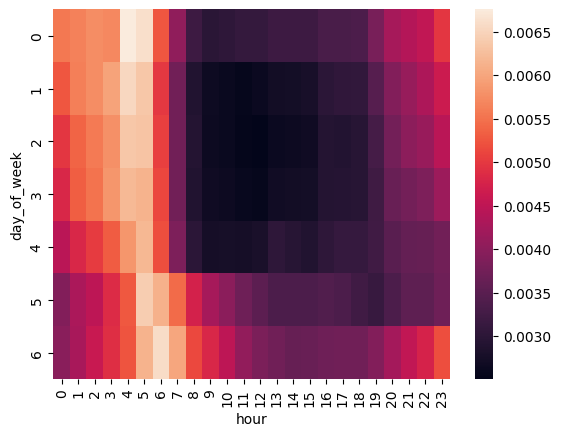

In [327]:
from seaborn import heatmap
heatmap(speed_medians.unstack())
plt.show()

In [328]:
trafic = speed_medians.copy()
av_speed = trafic.mean()
trafic.loc[trafic < av_speed] = 1
trafic.loc[trafic < 1] = 0

<Axes: xlabel='hour', ylabel='day_of_week'>

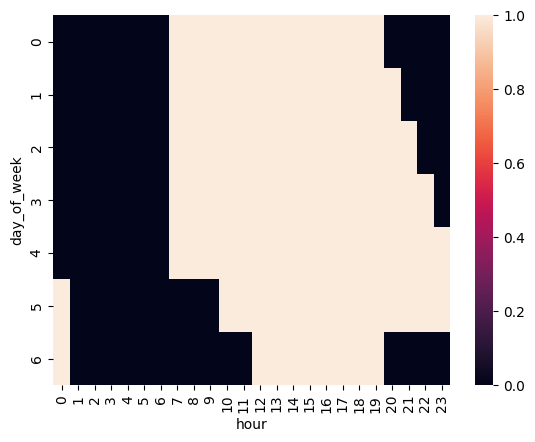

In [329]:
heatmap(trafic.unstack())

In [330]:
trafic.value_counts()

speed
1.0    99
0.0    69
Name: count, dtype: int64

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что оно зависит от предсказываемой переменной.

In [331]:
train.drop(columns='speed', inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Особенно хорошо видно на тепловом графике, который я построил для выделения времени пробок, какие промежутки времени можно назвать периодом пробок - ночь и вечер перед выходным днем, рабочее время в будние дни и с полудня в выходные.

In [332]:
trafic.sample(3)

day_of_week  hour
1            19      1.0
2            3       0.0
4            4       0.0
Name: speed, dtype: float64

In [333]:
trafic[trafic == 1]

day_of_week  hour
0            7       1.0
             8       1.0
             9       1.0
             10      1.0
             11      1.0
                    ... 
6            15      1.0
             16      1.0
             17      1.0
             18      1.0
             19      1.0
Name: speed, Length: 99, dtype: float64

In [334]:
a = set(trafic[1][trafic[0] == 1].index)
a

{7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [335]:
train.loc[:, 'trafic'] = train.apply(lambda x: trafic[x['day_of_week'], x['hour']], axis=1)
test.loc[:, 'trafic'] = test.apply(lambda x: trafic[x['day_of_week'], x['hour']], axis=1)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [336]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

In [337]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [338]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, top_left, bottom_right, n_rows, n_cols):
        self.top_left = top_left
        self.bottom_right = bottom_right
        self.n_rows = n_rows
        self.n_cols = n_cols
        
        self.lat_step = (top_left[0] - bottom_right[0]) / n_rows
        self.lon_step = (bottom_right[1] - top_left[1]) / n_cols

    def show_map(self):
        center_lat = (self.top_left[0] + self.bottom_right[0]) / 2
        center_lon = (self.top_left[1] + self.bottom_right[1]) / 2
        
        m = folium.Map(location=[center_lat, center_lon], zoom_start=11)
        
        for i in range(self.n_rows + 1):
            lat = self.top_left[0] - i * self.lat_step
            folium.PolyLine(locations=[[lat, self.top_left[1]], [lat, self.bottom_right[1]]], color="red", weight=2, opacity=0.8).add_to(m)
        
        for j in range(self.n_cols + 1):
            lon = self.top_left[1] + j * self.lon_step
            folium.PolyLine(locations=[[self.top_left[0], lon], [self.bottom_right[0], lon]], color="red", weight=2, opacity=0.8).add_to(m)
        
        return m

    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        
        def get_cell_number(lat, lon):
            if lat < self.bottom_right[0] or lat > self.top_left[0] or lon < self.top_left[1] or lon > self.bottom_right[1]:
                return -1
            
            row = int((self.top_left[0] - lat) / self.lat_step)
            col = int((lon - self.top_left[1]) / self.lon_step)
            
            return row * self.n_cols + col

        X_copy['start_cell'] = X_copy.apply(lambda row: get_cell_number(row['pickup_latitude'], row['pickup_longitude']), axis=1)
        X_copy['end_cell'] = X_copy.apply(lambda row: get_cell_number(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
        
        return X_copy


In [339]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
log_trip_duration     0
month                 0
day_of_week           0
hour                  0
yday                  0
is_anomaly            0
haversine             0
log_haversine         0
trafic                0
dtype: int64

In [340]:
top_left = (40.79, -74.04) 
bottom_right = (40.715, -73.96) 

grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

X_transformed = grid_transformer.fit_transform(train[:500])

grid_transformer.show_map()

In [341]:

categorical_features = ['month', 'day_of_week', 'hour', 'is_anomaly', 'start_cell', 'end_cell', 'trafic']
numerical_features = ['log_haversine', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

features = categorical_features + numerical_features

top_left = [40.79, -74.04]
bottom_right = [40.715, -73.96]
grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

# Разделяем данные на обучающую и тестовую выборки
X_train = grid_transformer.fit_transform(train)[features]
y_train = train['log_trip_duration']

X_test = grid_transformer.fit_transform(test)[features]
y_test = test['log_trip_duration']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Создаем пайплайн с препроцессором и Ridge-регрессией
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Обучаем модель
ridge_pipeline.fit(X_train, y_train)

# Оцениваем модель
train_score = ridge_pipeline.score(X_train, y_train)
test_score = ridge_pipeline.score(X_test, y_test)

print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")

Train R² score: 0.6325
Test R² score: 0.6312


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [342]:
df[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()

vendor_id              2
passenger_count       10
store_and_fwd_flag     2
dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [343]:
df['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [344]:
train['vendor_id'] = train['vendor_id'].map({1: 0, 2: 1})
test['vendor_id'] = test['vendor_id'].map({1: 0, 2: 1})

In [345]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

In [346]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration', 'month',
       'day_of_week', 'hour', 'yday', 'is_anomaly', 'haversine',
       'log_haversine', 'trafic'],
      dtype='object')

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [347]:
# Разделим признаки на категориальные и числовые
categorical_features = ['month', 'day_of_week', 'hour', 'is_anomaly', 'trafic', 'start_cell', 'end_cell', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']
numerical_features = ['log_haversine', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

features = categorical_features + numerical_features

top_left = [40.79, -74.04]
bottom_right = [40.715, -73.96]
grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

# Разделяем данные на обучающую и тестовую выборки
X_train = grid_transformer.fit_transform(train)[features]
y_train = train['log_trip_duration']

X_test = grid_transformer.fit_transform(test)[features]
y_test = test['log_trip_duration']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Создаем пайплайн с препроцессором и Ridge-регрессией
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Обучаем модель
ridge_pipeline.fit(X_train, y_train)

# Оцениваем модель
train_score = ridge_pipeline.score(X_train, y_train)
test_score = ridge_pipeline.score(X_test, y_test)

print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")

Train R² score: 0.6331
Test R² score: 0.6318


In [348]:
0.6294 - 0.6289

0.0004999999999999449

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [349]:
train = train.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])
test = test.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [350]:
smol = np.quantile(train['log_trip_duration'], 0.005)
big = np.quantile(train['log_trip_duration'], 0.995)

<Axes: >

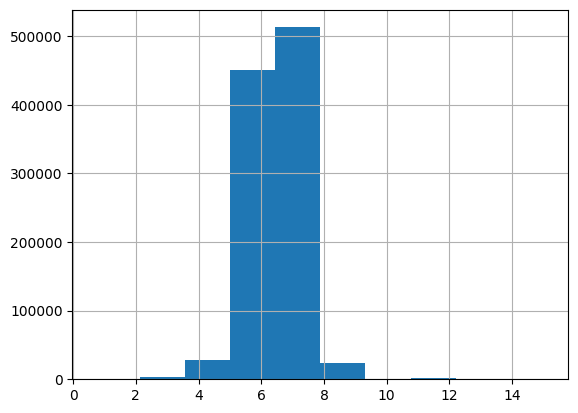

In [351]:
train['log_trip_duration'].hist()

<Axes: >

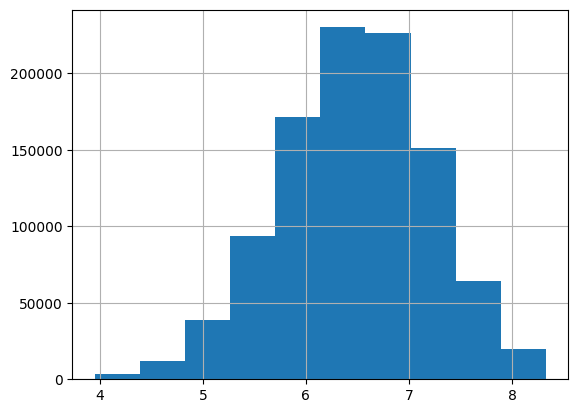

In [352]:
train.loc[(train['log_trip_duration'] > smol) & (train['log_trip_duration'] < big), 'log_trip_duration'].hist()

<Axes: >

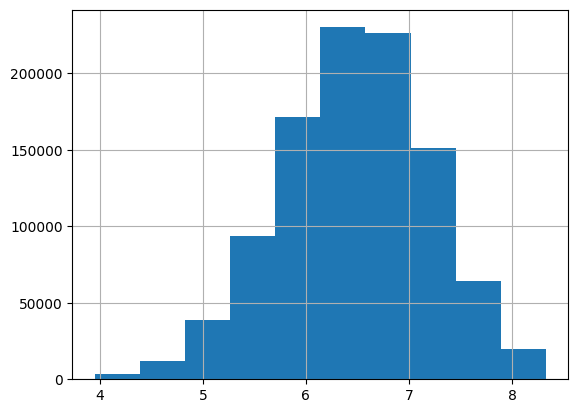

In [353]:
train.loc[(train['log_trip_duration'] > smol) & (train['log_trip_duration'] < big), 'log_trip_duration'].hist()

In [354]:
train = train.loc[(train['log_trip_duration'] > smol) & (train['log_trip_duration'] < big)]

In [355]:
smol = np.quantile(train['log_haversine'], 0.005)
big = np.quantile(train['log_haversine'], 0.995)

<Axes: >

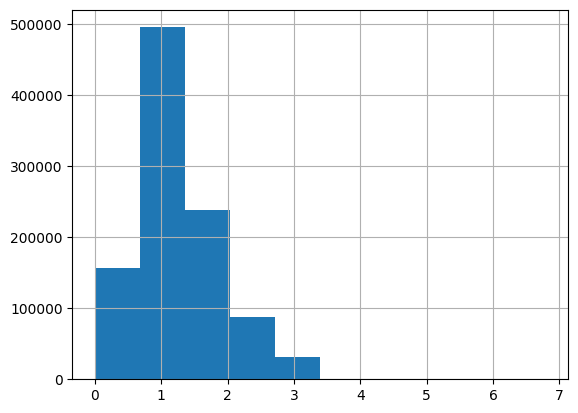

In [356]:
train['log_haversine'].hist()

<Axes: >

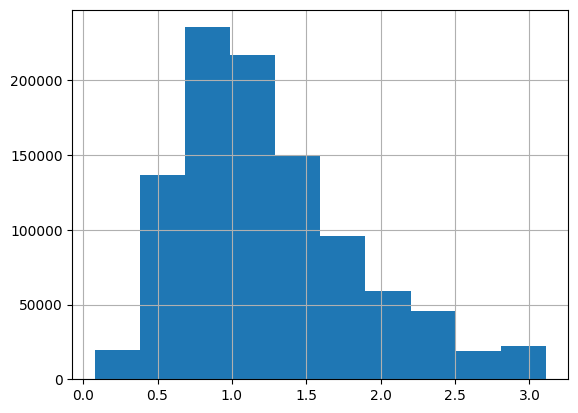

In [357]:
train.loc[(train['log_haversine'] > smol) & (train['log_haversine'] < big), 'log_haversine'].hist()

In [358]:
train = train.loc[(train['log_haversine'] > smol) & (train['log_haversine'] < big)]

Выглядит гораздо приятнее, при том, что мы выбросили только 1% выборки

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [363]:
categorical_features

['month',
 'day_of_week',
 'hour',
 'is_anomaly',
 'trafic',
 'start_cell',
 'end_cell',
 'vendor_id',
 'passenger_count',
 'store_and_fwd_flag']

In [368]:
train['is_anomaly'].value_counts()

is_anomaly
False    989355
True      11325
Name: count, dtype: int64

Выглядит не так уж и плохо. Хоть это и анмальный период, не хочется выбрасывать столько данных.

In [372]:
X_train['start_cell'].value_counts() 

start_cell
-1     255106
 6     216496
 7     167247
 10    135070
 3      79949
 9      65446
 2      58023
 5      34349
 11      9230
 8         54
 4         52
 1         18
 0         10
Name: count, dtype: int64

Наверное стоит получше выбрать сетку, но это не очень интересно, поэтому оставим как есть.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [374]:

# Разделим признаки на категориальные и числовые
categorical_features = ['month', 'day_of_week', 'hour', 'is_anomaly', 'trafic', 'start_cell', 'end_cell']
numerical_features = ['log_haversine', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

features = categorical_features + numerical_features

top_left = [40.79, -74.04]
bottom_right = [40.715, -73.96]
grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

# Разделяем данные на обучающую и тестовую выборки
X_train = grid_transformer.fit_transform(train)[features]
y_train = train['log_trip_duration']

X_test = grid_transformer.fit_transform(test)[features]
y_test = test['log_trip_duration']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Создаем пайплайн с препроцессором и Ridge-регрессией
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Обучаем модель
ridge_pipeline.fit(X_train, y_train)

# Оцениваем модель
train_score = ridge_pipeline.score(X_train, y_train)
test_score = ridge_pipeline.score(X_test, y_test)

print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")

Train R² score: 0.6862
Test R² score: 0.5927


Похоже модель слегка переобучилась на обучающей выборке. Но понижение точность на тестовой не всегда плохо, возможно мы стали больше ошибаться на выбросах, что может приводить к росту ошибки на конкретных тестовых данных, но снижению ошибки на генеральной совокупности.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [378]:
encoder = OneHotEncoder(drop='first')
encoder.fit_transform(train).shape

(1000680, 4116359)

In [379]:
train.shape

(1000680, 15)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [388]:
from sklearn.linear_model import Lasso
# Разделим признаки на категориальные и числовые
categorical_features = ['month', 'day_of_week', 'hour', 'is_anomaly', 'trafic', 'start_cell', 'end_cell']
numerical_features = ['log_haversine']

features = categorical_features + numerical_features

top_left = [40.79, -74.04]
bottom_right = [40.715, -73.96]
grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

# Разделяем данные на обучающую и тестовую выборки
X_train = grid_transformer.fit_transform(train)[features]
y_train = train['log_trip_duration']

X_test = grid_transformer.fit_transform(test)[features]
y_test = test['log_trip_duration']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_features)
    ])

# Создаем пайплайн с препроцессором и Ridge-регрессией
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1))
])

# Обучаем модель
ridge_pipeline.fit(X_train, y_train)

# Оцениваем модель
train_score = ridge_pipeline.score(X_train, y_train)
test_score = ridge_pipeline.score(X_test, y_test)

print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score: {test_score:.4f}")

Train R² score: 0.0000
Test R² score: -0.0000


Похоже Lasso показывает результат сравнимый с оценкой средним значением.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [399]:
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [495]:
alphas = np.logspace(-5, 5, 20)
scores = []

categorical_features = ['month', 'day_of_week', 'hour', 'is_anomaly', 'trafic', 'start_cell', 'end_cell']
numerical_features = ['log_haversine']

features = categorical_features + numerical_features

top_left = [40.79, -74.04]
bottom_right = [40.715, -73.96]
grid_transformer = MapGridTransformer(top_left, bottom_right, n_rows=3, n_cols=4)

X_train = grid_transformer.fit_transform(train)[features]
y_train = train['log_trip_duration']

# x_test = grid_transformer.fit_transform(test)[features]
# y_test = test['log_trip_duration']


x_val = grid_transformer.fit_transform(val)[features]
y_val = val['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_features)
    ])

for alpha in alphas:
    ridge_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])

    # Обучаем модель
    ridge_pipeline.fit(X_train, y_train)

    val_score = ridge_pipeline.score(x_val, y_val)
    scores.append(val_score)


In [496]:
best_ridge_alpha = alphas[scores.index(max(scores))]
print(f"Best Ridge alpha:\t{best_ridge_alpha: 0.4f}")

Best Ridge alpha:	 0.1624


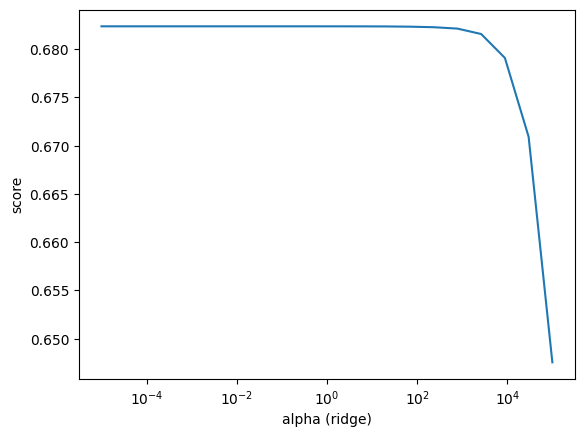

In [497]:
plt.plot(alphas, scores)
plt.xscale("log")
plt.xlabel("alpha (ridge)")
plt.ylabel("score")
plt.show()

In [498]:
best_ridge_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=best_ridge_alpha))
    ])

best_ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_haversine']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['month', 'day_of_week',
                                                   'hour', 'is_anomaly',
                                                   'trafic', 'start_cell',
                                                   'end_cell'])])),
                ('regressor', Ridge(alpha=0.1623776739188721))])

In [499]:
y_pred = best_ridge_model.predict(x_test)
best_ridge_rmsle = rmsle(y_pred, y_test)
best_ridge_rmsle

0.4844758159228574

In [500]:
scores = []
for alpha in alphas:
    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])

    lasso_pipeline.fit(X_train, y_train)

    val_score = lasso_pipeline.score(x_val, y_val)
    scores.append(val_score)

In [501]:
best_lasso_alpha = alphas[scores.index(max(scores))]
print(f"Best Lasso alpha:\t{best_lasso_alpha: 0.6f}")

Best Lasso alpha:	 0.000010


In [547]:
best_lasso_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=best_lasso_alpha))
    ])

best_lasso_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_haversine']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['month', 'day_of_week',
                                                   'hour', 'is_anomaly',
                                                   'trafic', 'start_cell',
                                                   'end_cell'])])),
                ('regressor', Lasso(alpha=1e-05))])

In [546]:
y_pred = best_lasso_model.predict(x_test)
best_lasso_rmsle = rmsle(y_pred, y_test)
best_lasso_rmsle

0.49579234538436245

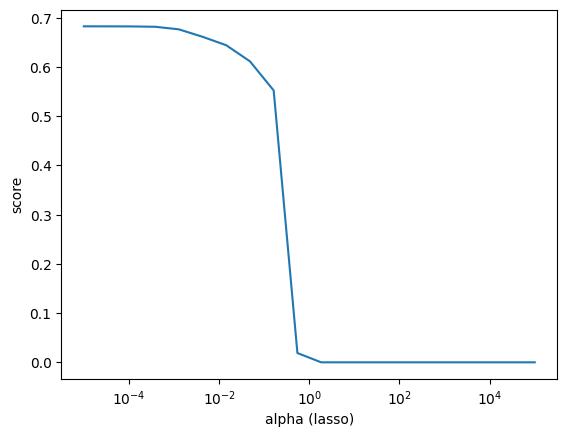

In [504]:
plt.plot(alphas, scores)
plt.xscale("log")
plt.xlabel("alpha (lasso)")
plt.ylabel("score")
plt.show()

Сохраните наилучшее значение, как бенчмарк на будущее

In [505]:
best_rmsle = min(best_ridge_rmsle, best_lasso_rmsle)
best_rmsle

0.48446503067919405

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [519]:
scores = []
zeros = []
for alpha in alphas:
    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])

    lasso_pipeline.fit(X_train, y_train)

    zerocount = np.sum(lasso_pipeline.named_steps['regressor'].coef_ == 0)
    zeros.append(zerocount)

    val_score = lasso_pipeline.score(x_val, y_val)
    scores.append(val_score)

In [520]:
zeros

[6, 7, 9, 14, 18, 45, 58, 59, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61]

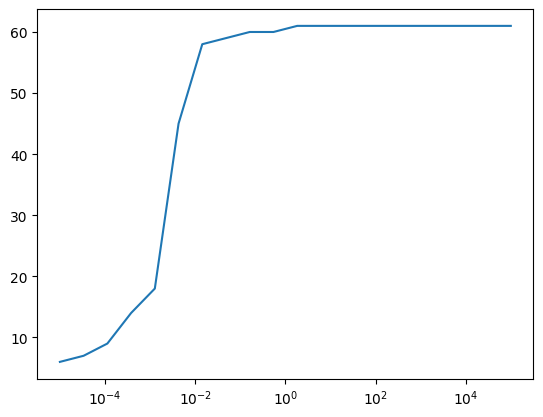

In [521]:
plt.plot(alphas, zeros)
plt.xscale('log')

Нам надо получить 30 нулей

In [522]:
alphas[4], alphas[5]
zeros[4], zeros[5]

(18, 45)

In [532]:
alphas2 = np.linspace(alphas[4], alphas[5], 5)
scores = []
zeros = []
for alpha in alphas2:
    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])

    lasso_pipeline.fit(X_train, y_train)

    zerocount = np.sum(lasso_pipeline.named_steps['regressor'].coef_ == 0)
    zeros.append(zerocount)

    val_score = lasso_pipeline.score(x_val, y_val)
    scores.append(val_score)

In [533]:
zeros

[18, 27, 33, 40, 45]

In [540]:
alphas2[2]

0.0027778036922112624

При этой альфе мы избавляемся в лассо регрессии от половины признаков.

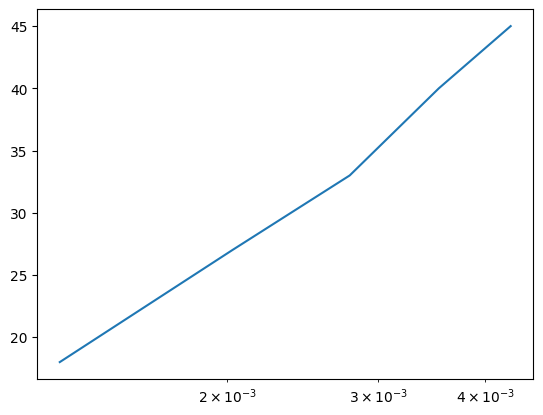

In [534]:
plt.plot(alphas2, zeros)
plt.xscale('log')
plt.show()

In [543]:
zeros_lasso_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alphas2[3]))
    ])

zeros_lasso_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_haversine']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['month', 'day_of_week',
                                                   'hour', 'is_anomaly',
                                                   'trafic', 'start_cell',
                                                   'end_cell'])])),
                ('regressor', Lasso(alpha=0.003529568045465327))])

In [544]:
y_pred = zeros_lasso_model.predict(x_test)
zeros_lasso_rmsle = rmsle(y_pred, y_test)
zeros_lasso_rmsle

0.49579234538436245

In [545]:
best_lasso_rmsle - zeros_lasso_rmsle

-0.011327314705168401

In [548]:
best_lasso_model.score(x_test, y_test) - zeros_lasso_model.score(x_test, y_test)

0.017539726241516007